# Machine Learning Workout 

Cross-validation ways examples, ROC curve via Seaborn, classification threshold adjusting and classification accuracy metrics examples. 

The workout is partially based on amazing DataSchool YouTube series: https://www.youtube.com/user/dataschool/playlists

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cross_validation import train_test_split
from sklearn import metrics

%matplotlib inline

import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

from sklearn.cross_validation import train_test_split

D:\ML\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Iris dataset

In [2]:
iris = load_iris() # load the dataset
pd.DataFrame(iris.data).head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
x = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)

print("x shape: %s" % str(x.shape))
print("y shape: %s" % str(y.shape))

x shape: (150, 4)
y shape: (150,)


### Cross-validation

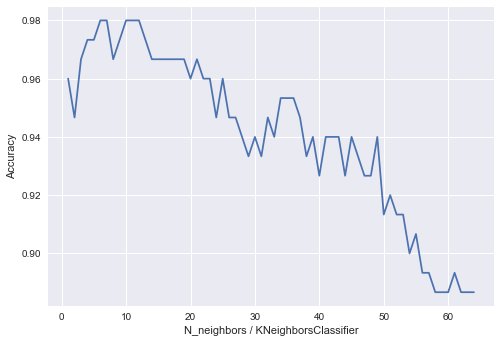

Max accuracy  = 0.98; n_neighbors value = 5


In [6]:
# basic crossvalidation with KNeighborsClassifier on the entire dataset
# you can't use it in real life 
# because of overfitting

kRange = range(1, 65, 1)
scores = []

for k in kRange:
    classifier = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(classifier, x, y, cv = 5, scoring='accuracy')
    scores.append(score.mean())
    
#plot the value of K for KNN (x-axis) versus the cross validated accuracy (y-axis)
plt.plot(kRange, scores)
plt.xlabel('N_neighbors / KNeighborsClassifier')
plt.ylabel('Accuracy')
plt.show()

print("Max accuracy  = %s; n_neighbors value = %s" % (max(pd.Series(scores)), pd.Series(scores).idxmax()))

### Train/Test Split

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 4)

print("x_train shape: %s" % str(x_train.shape))
print("x_test shape: %s" % str(x_test.shape))
print("y_train shape: %s" % str(y_train.shape))
print("y_test shape: %s" % str(y_test.shape))

x_train shape: (90, 4)
x_test shape: (60, 4)
y_train shape: (90,)
y_test shape: (60,)


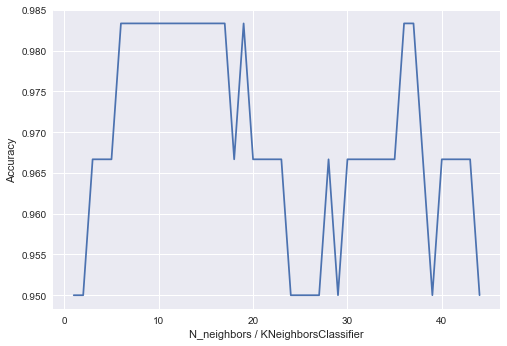

Max accuracy  = 0.983333333333; n_neighbors value = 5


In [9]:
# classifier makes predictions on unseen test data after training on train data

k_range = range(1, 45, 1)
scores = []

for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(k_range, scores)
plt.xlabel('N_neighbors / KNeighborsClassifier')
plt.ylabel('Accuracy')
plt.show()

print("Max accuracy  = %s; n_neighbors value = %s" % (max(pd.Series(scores)), pd.Series(scores).idxmax()))

### Visualising data using Seaborn

In [25]:
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.tail()

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


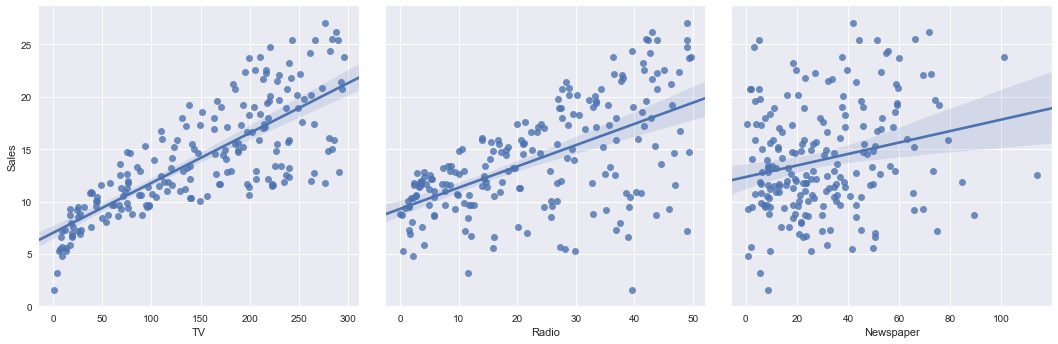

In [26]:
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', size=5, kind='reg')

In [27]:
x = data.iloc[:, :3]
y = data.iloc[:, 3]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4)

x.shape

(200, 3)

### Seaborn pairplot

In [13]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv(url, header=None, names=col_names)
pima.head(10)

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


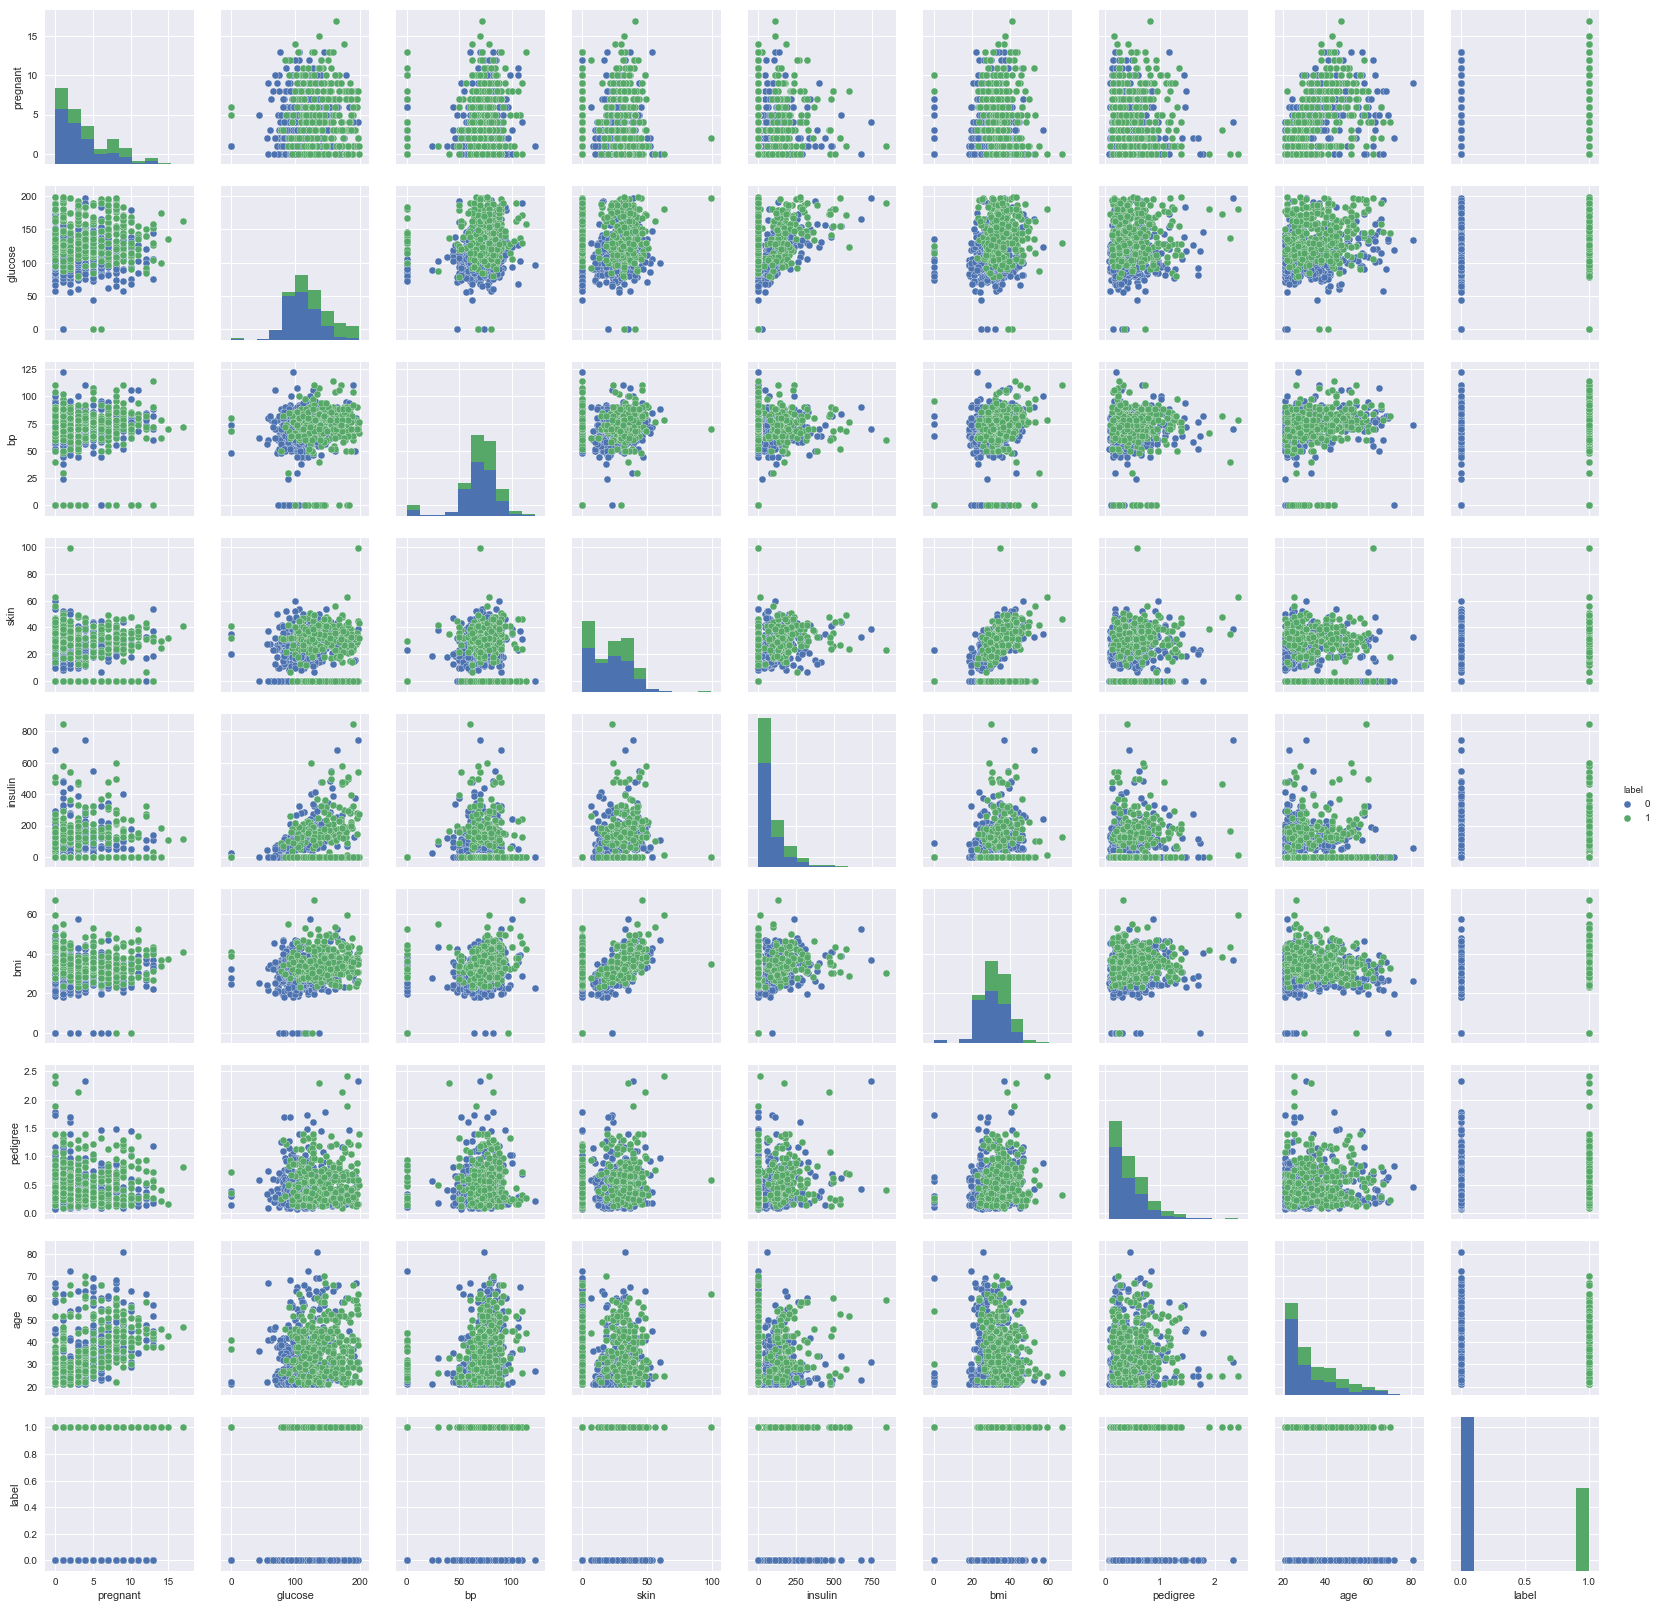

In [11]:
sns.pairplot(data=pima, hue='label')

In [14]:
x = pima.iloc[:, :-1]
y = pima.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4)

x_train.shape

(460, 8)

## Cross-validation / right and wrong

The right way to cross-validate: http://nbviewer.jupyter.org/github/cs109/content/blob/master/lec_10_cross_val.ipynb

![title](/Images/75.jpg)

### Multiple cross-validations with GridSearchCV

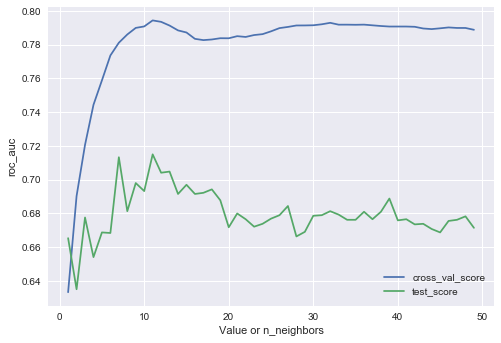

Max CV roc_auc  = 0.794328782872; n_neighbors value = 11
Max test roc_auc  = 0.714965986395; n_neighbors value = 11


In [54]:
from sklearn.model_selection import GridSearchCV

# hyperparameters range
minimum = 1
maximum = 50
k_range = range(minimum, maximum, 1)
# weight_options = ['uniform', 'distance']

# hyperparameters map
# param_grid = dict(n_neighbors=k_range, weights=weight_options)
param_grid = dict(n_neighbors=k_range)

# Grid scoring
grid_scoring = 'roc_auc'

# CV range
cv_range = range(3, 11)
scores_names =  'CV_' + pd.Series(list(cv_range)).astype(str)
scores = pd.DataFrame()
scores_test = [] # test values list
scores['hp_value'] = pd.Series(list(k_range)).astype(str)

# Show all CVs on the plot
showAll = False

knn = KNeighborsClassifier()  

# loop inside cv_range
# and calculate mean roc auc value for each 
for cv_number, cv_value in enumerate(cv_range):
    
    grid = GridSearchCV(knn, param_grid, cv=cv_value, scoring=grid_scoring)
    grid.fit(x_train, y_train)    
    scores[scores_names[cv_number]] = grid.cv_results_['mean_test_score']

# loop inside hyperparameters range
for i, k in enumerate(k_range):
    # Algorithm
    knn = KNeighborsClassifier(n_neighbors=k)  
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores_test.append(metrics.roc_auc_score(y_test, y_pred)) 

# calculate mean for each hyperparameter value
scores['mean'] = scores.ix[:, 1:].mean(axis=1) # mean for each row
# scores_test['mean'] = scores_test.ix[:, 1:].mean(axis=1) # mean for each row
        
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, scores['mean'], label='cross_val_score')
plt.plot(k_range, pd.Series(scores_test), label='test_score')

# show all CVs
if(showAll):
    for n in list(range(1, len(scores.columns) - 1)):
        plt.plot(k_range, scores.ix[:, n], label=scores.columns[n]) 

plt.legend()
plt.xlabel('Value or n_neighbors')
plt.ylabel(grid_scoring)
plt.show()

print("Max CV %s  = %s; n_neighbors value = %s" % (grid_scoring, max(pd.Series(scores['mean'])), minimum + pd.Series(scores['mean']).idxmax()))
print("Max test %s  = %s; n_neighbors value = %s" % (grid_scoring, max(pd.Series(scores_test)), minimum + pd.Series(scores_test).idxmax()))
    

In [55]:
scores.head(15) # GridSearchCV mean_test_score

,hp_value,CV_3,CV_4,CV_5,CV_6,CV_7,CV_8,CV_9,CV_10,mean
0,1,0.651715,0.653908,0.625862,0.623902,0.624088,0.630477,0.630238,0.626065,0.633282
1,2,0.710985,0.699297,0.679868,0.688357,0.685986,0.685707,0.689921,0.681846,0.690246
2,3,0.724445,0.730688,0.714604,0.717958,0.716577,0.716575,0.724699,0.719168,0.720589
3,4,0.752233,0.753834,0.745639,0.741499,0.741718,0.737375,0.741018,0.741278,0.744324
4,5,0.772095,0.772084,0.762475,0.753187,0.750806,0.754268,0.753988,0.751623,0.758816
5,6,0.781841,0.782875,0.771197,0.764979,0.773636,0.776166,0.770073,0.767748,0.773564
6,7,0.790800,0.789402,0.779970,0.783301,0.780653,0.777789,0.775599,0.771298,0.781101
7,8,0.794043,0.787306,0.783773,0.783521,0.783597,0.781273,0.786323,0.788134,0.785996
8,9,0.797554,0.794263,0.784331,0.787818,0.787878,0.789726,0.788920,0.788641,0.789891
9,10,0.795388,0.795480,0.784686,0.789407,0.789492,0.790549,0.791702,0.789351,0.790757


In [56]:
grid.cv_results_.keys() # there are a lot of interesting things :)

dict_keys(['split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'split5_train_score', 'split6_train_score', 'split7_train_score', 'split8_train_score', 'split9_train_score', 'mean_train_score', 'std_train_score', 'mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_n_neighbors', 'params'])

## Classification accuracy metrics

In [57]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.733766233766


In [26]:
# Class distribution
y_test.value_counts()

0    210
1     98
Name: label, dtype: int64

### Confusion matrix

In [27]:
# IMPORTANT: first argument is true values, second argument - predicted values
print(metrics.confusion_matrix(y_test, y_pred))

[[177  33]
 [ 49  49]]


In [28]:
TN = metrics.confusion_matrix(y_test, y_pred)[0,0]
FN = metrics.confusion_matrix(y_test, y_pred)[1,0]
FP = metrics.confusion_matrix(y_test, y_pred)[0,1]
TP = metrics.confusion_matrix(y_test, y_pred)[1,1]

print('TN = %s; FN = %s; FP = %s; TP = %s;' % (TN, FN, FP, TP))

TN = 177; FN = 49; FP = 33; TP = 49;


### Classification Accuracy: overall, how often is the classifier correct?

In [29]:
print((TP + TN) / (TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred))

0.733766233766
0.733766233766


### Classification Error: overall, how often is the classifier incorrect?
Also known as "Misclassification rate"

In [30]:
print((FP + FN) / (TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, y_pred))

0.266233766234
0.266233766234


### Sensitivity: When the actual value is positive, how often is the prediction correct?
How "sensitive" is the classifier to detecting positive instances?
Also known as "True Positive Rate" or Recall

In [31]:
print(TP / (TP + FN))
print(metrics.recall_score(y_test, y_pred))

0.5
0.5


### Specificity: When the actual value is negative, how often is the prediction correct?
How "specific" (or selective) is the classifier in predicting positive instances?

In [32]:
print(TN / (TN + FP))

0.842857142857


### False positive rate: When the actual value is negative, how often is the prediction incorrect?

In [34]:
print(FP / (TN + FP))

0.157142857143


### Precition: When a positive value is predicted, how often is the prediction correct?
How "precise" is the classifier when predicting positive instances?

In [35]:
print(TP / (TP + FP))
print(metrics.precision_score(y_test, y_pred))

0.59756097561
0.59756097561


### Adjusting the classification threshold

In [36]:
# print the first 10 predicted responses
knn.predict(x_test)[0:10]

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [37]:
# print the first 10 predicted probabilities of class membership
knn.predict_proba(x_test)[0:10, :]

array([[ 0.28571429,  0.71428571],
       [ 0.7755102 ,  0.2244898 ],
       [ 0.71428571,  0.28571429],
       [ 0.59183673,  0.40816327],
       [ 0.69387755,  0.30612245],
       [ 0.59183673,  0.40816327],
       [ 0.79591837,  0.20408163],
       [ 0.32653061,  0.67346939],
       [ 0.65306122,  0.34693878],
       [ 0.40816327,  0.59183673]])

In [38]:
# print the first 10 predicted probabilities for class 1
knn.predict_proba(x_test)[0:10, 1]

array([ 0.71428571,  0.2244898 ,  0.28571429,  0.40816327,  0.30612245,
        0.40816327,  0.20408163,  0.67346939,  0.34693878,  0.59183673])

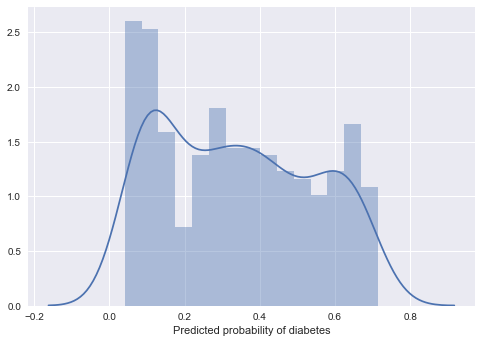

In [39]:
y_pred_proba = knn.predict_proba(x_test)[:, 1]

sns.distplot(y_pred_proba, bins=15, axlabel='Predicted probability of diabetes')

#### Decrease the threshold for predicting diabetes in order to increase the sensitivity of the classifier

In [40]:
# predict diabetes if the predicted probability is greater that 0.3
from sklearn.preprocessing import binarize

y_pred = binarize(y_pred_proba, 0.3)[0]

# print the first 10 predicted probabilities
y_pred_proba[:10]

D:\ML\Anaconda2\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 0.71428571,  0.2244898 ,  0.28571429,  0.40816327,  0.30612245,
        0.40816327,  0.20408163,  0.67346939,  0.34693878,  0.59183673])

In [41]:
# print the first 10 predicted classes with the lower threshold
y_pred[:10]

array([ 1.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  1.])

In [42]:
# print the new confusion matrix (threshold of 0.3)

print(metrics.confusion_matrix(y_test, y_pred))

[[124  86]
 [ 15  83]]


In [43]:
TN = metrics.confusion_matrix(y_test, y_pred)[0,0]
FN = metrics.confusion_matrix(y_test, y_pred)[1,0]
FP = metrics.confusion_matrix(y_test, y_pred)[0,1]
TP = metrics.confusion_matrix(y_test, y_pred)[1,1]

print('TN = %s; FN = %s; FP = %s; TP = %s;' % (TN, FN, FP, TP))

TN = 124; FN = 15; FP = 86; TP = 83;


In [44]:
# new sensitivity value
print(TP / (TP + FN))
print(metrics.recall_score(y_test, y_pred))

0.84693877551
0.84693877551


In [45]:
# new specificity value 
print(TN / (TN + FP))

0.590476190476


#### Conclusion:
- Threshold of 0.5 is used by default to convert predicted probabilities into class predictions 
- Threshold can be adjusted to increase sensitivity or specificity
- Sensitivity and specificity have an inverse relationship

### ROC Curves and Area Under the Curve (AUC)

**Question:** Wouldn't it be nice if we could see how sensitivity and specificity are affected by various thresholds, without actually changing the threshold?

**Answer:** Plot the ROC curve!

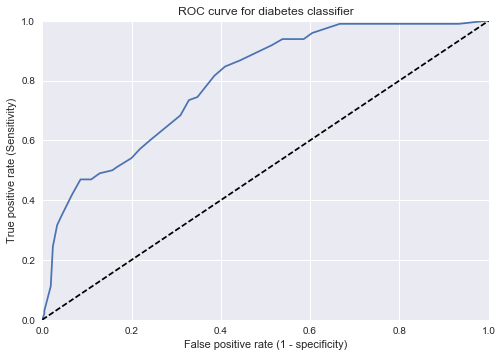

In [46]:
# IMPORTANT: First argument is true values, second is the predicted probabilities
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False positive rate (1 - specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)